In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Load datasets
daily_df = pd.read_csv('/content/daily_data.csv')
monthly_df = pd.read_csv('/content/monthly_data.csv')
three_hourly_df = pd.read_csv('/content/three_hour_data.csv.zip')

with zipfile.ZipFile('/content/hourly_data.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
hourly_df = pd.read_csv('/content/hourly_data.csv')

# Display the structure of the datasets
print("Daily Data Columns:", daily_df.columns)
print("Monthly Data Columns:", monthly_df.columns)
print("Three Hourly Data Columns:", three_hourly_df.columns)
print("Hourly Data Columns:", hourly_df.columns)





Daily Data Columns: Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'BackupElements',
       'BackupElevation', 'BackupEquipment', 'BackupLatitude',
       'BackupLongitude', 'BackupName', 'DailyAverageDewPointTemperature',
       'DailyAverageDryBulbTemperature', 'DailyAverageRelativeHumidity',
       'DailyAverageSeaLevelPressure', 'DailyAverageStationPressure',
       'DailyAverageWetBulbTemperature', 'DailyAverageWindSpeed',
       'DailyCoolingDegreeDays', 'DailyDepartureFromNormalAverageTemperature',
       'DailyHeatingDegreeDays', 'DailyMaximumDryBulbTemperature',
       'DailyMinimumDryBulbTemperature', 'DailyPeakWindDirection',
       'DailyPeakWindSpeed', 'DailyPrecipitation', 'DailySnowDepth',
       'DailySnowfall', 'DailySustainedWindDirection',
       'DailySustainedWindSpeed', 'Sunrise', 'Sunset',
       'WindEquipmentChangeDate'],
      dtype='object')
Monthly Data Columns: Index(['STATION', 'DATE', 'REPORT_TYPE', 'SOURCE', 'AWND', 'BackupElements',
       'BackupEl

<ipython-input-15-0c11d2e996ce>:13: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_df = pd.read_csv('/content/hourly_data.csv')


In [ ]:
# Convert date columns to datetime format
daily_df['DATE'] = pd.to_datetime(daily_df['DATE'], errors='coerce')
monthly_df['DATE'] = pd.to_datetime(monthly_df['DATE'], errors='coerce')
three_hourly_df['DATE'] = pd.to_datetime(three_hourly_df['DATE'], errors='coerce')
hourly_df['DATE'] = pd.to_datetime(hourly_df['DATE'], errors='coerce')

# Verify conversion
print("Daily Data Date Range:", daily_df['DATE'].min(), "to", daily_df['DATE'].max())
print("Monthly Data Date Range:", monthly_df['DATE'].min(), "to", monthly_df['DATE'].max())
print("Three Hourly Data Date Range:", three_hourly_df['DATE'].min(), "to", three_hourly_df['DATE'].max())
print("Hourly Data Date Range:", hourly_df['DATE'].min(), "to", hourly_df['DATE'].max())


Daily Data Date Range: 2015-01-01 23:59:00 to 2022-05-31 23:59:00
Monthly Data Date Range: 2015-01-31 23:59:00 to 2022-05-31 23:59:00
Three Hourly Data Date Range: 2015-01-01 01:00:00 to 2022-05-31 22:00:00
Hourly Data Date Range: 2015-01-01 00:51:00 to 2022-05-31 23:51:00


Daily Data Summary Statistics:
            STATION                           DATE  SOURCE  BackupElevation  \
count  2.668000e+03                           2668  2668.0           2668.0   
mean   7.251801e+10  2018-10-01 14:07:27.346326784     6.0            260.0   
min    7.251801e+10            2015-01-01 23:59:00     6.0            260.0   
25%    7.251801e+10            2016-11-29 17:59:00     6.0            260.0   
50%    7.251801e+10            2018-10-02 11:59:00     6.0            260.0   
75%    7.251801e+10            2020-08-03 05:59:00     6.0            260.0   
max    7.251801e+10            2022-05-31 23:59:00     6.0            260.0   
std    0.000000e+00                            NaN     0.0              0.0   

       BackupLatitude  BackupLongitude  DailyAverageDewPointTemperature  \
count     2668.000000      2668.000000                      2668.000000   
mean        42.689750       -73.828268                        38.217766   
min         42.681200       -73.

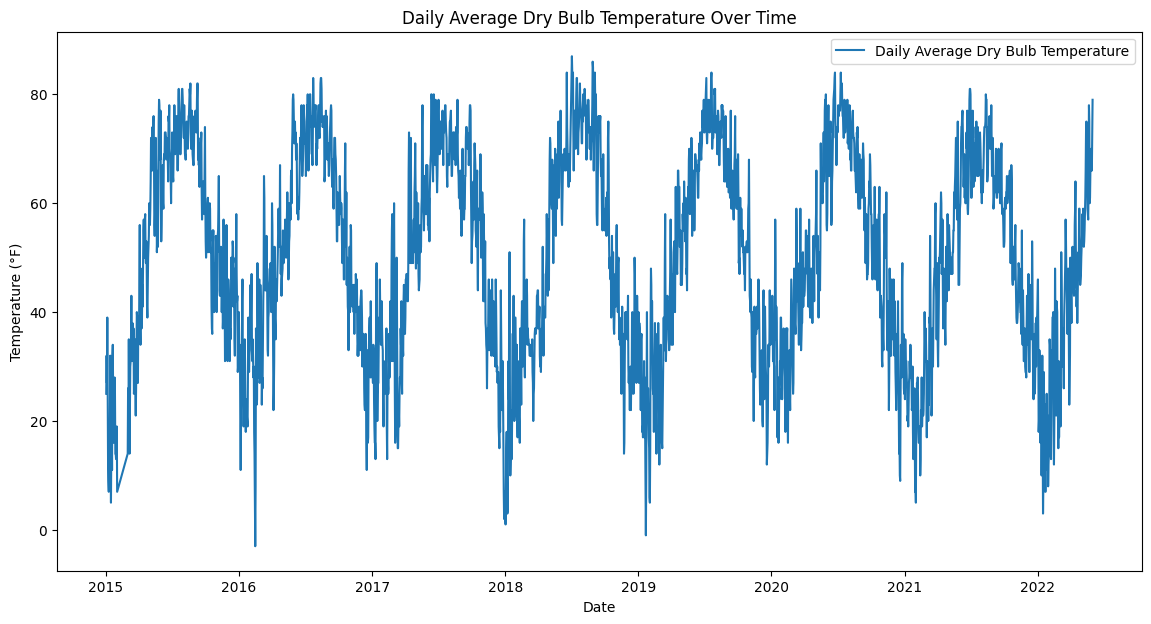

In [ ]:
# Daily Data: Summary Statistics
print("Daily Data Summary Statistics:")
print(daily_df.describe())

# Plot Daily Average Temperature
plt.figure(figsize=(14,7))
plt.plot(daily_df['DATE'], daily_df['DailyAverageDryBulbTemperature'], label='Daily Average Dry Bulb Temperature')
plt.title('Daily Average Dry Bulb Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()



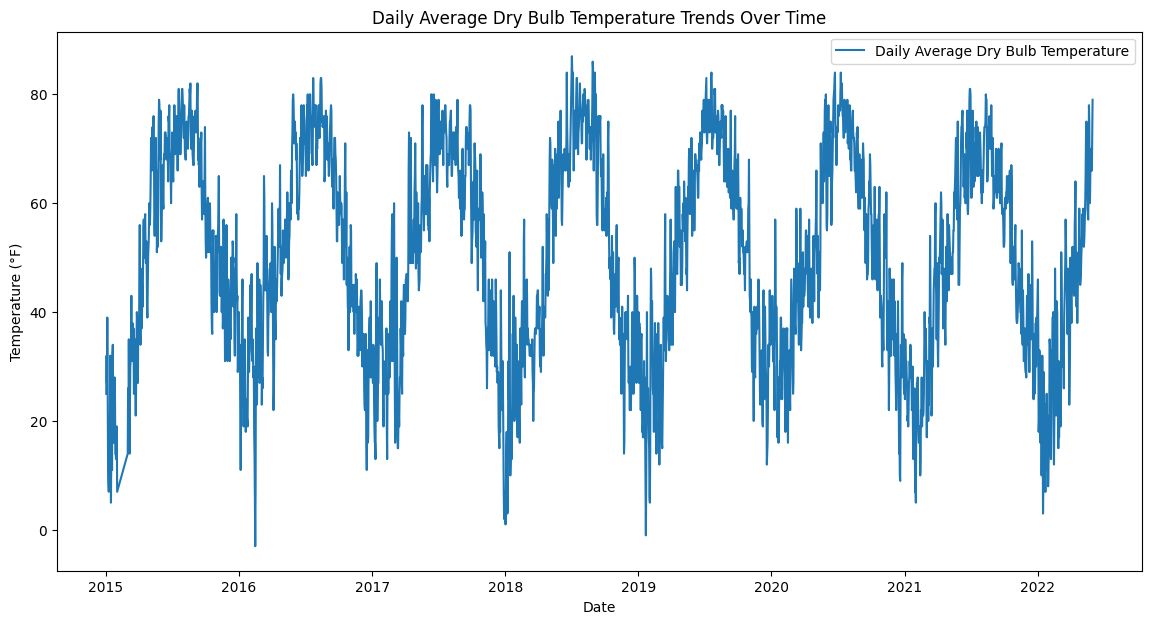

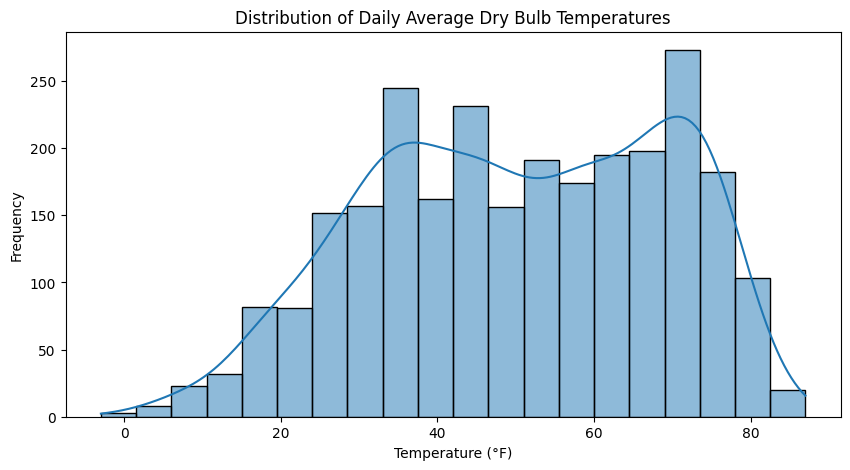

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot daily temperature trends over time
plt.figure(figsize=(14,7))
plt.plot(daily_df['DATE'], daily_df['DailyAverageDryBulbTemperature'], label='Daily Average Dry Bulb Temperature')
plt.title('Daily Average Dry Bulb Temperature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Plot histogram of daily temperatures
plt.figure(figsize=(10,5))
sns.histplot(daily_df['DailyAverageDryBulbTemperature'], kde=True)
plt.title('Distribution of Daily Average Dry Bulb Temperatures')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()


Monthly Data Summary Statistics:
            STATION                           DATE  SOURCE       AWND  \
count  8.700000e+01                             87    87.0  87.000000   
mean   7.251801e+10  2018-09-25 12:40:22.758621184     6.0   7.596552   
min    7.251801e+10            2015-01-31 23:59:00     6.0   4.700000   
25%    7.251801e+10            2016-11-15 23:59:00     6.0   6.500000   
50%    7.251801e+10            2018-08-31 23:59:00     6.0   7.400000   
75%    7.251801e+10            2020-08-16 11:59:00     6.0   8.700000   
max    7.251801e+10            2022-05-31 23:59:00     6.0  10.700000   
std    0.000000e+00                            NaN     0.0   1.458930   

       BackupElevation  BackupLatitude  BackupLongitude         CDSD  \
count             87.0       87.000000        87.000000    87.000000   
mean             260.0       42.689729       -73.828239   362.954023   
min              260.0       42.681200       -73.831090     0.000000   
25%              260.

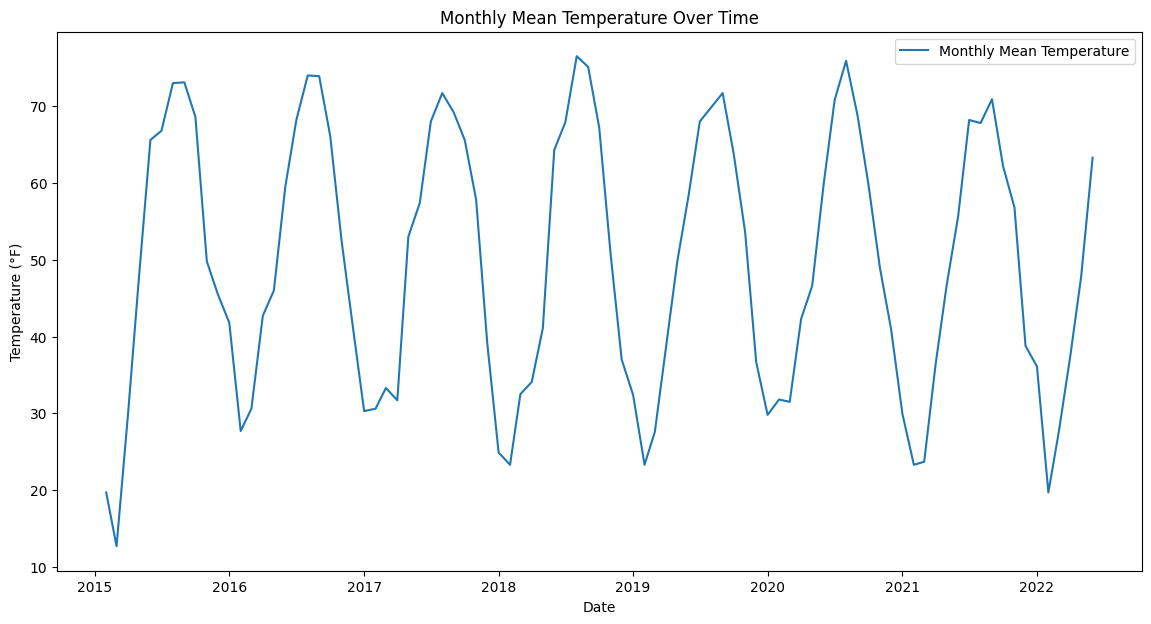

In [ ]:
# Monthly Data: Summary Statistics
print("Monthly Data Summary Statistics:")
print(monthly_df.describe())

# Plot Monthly Mean Temperature
plt.figure(figsize=(14,7))
plt.plot(monthly_df['DATE'], monthly_df['MonthlyMeanTemperature'], label='Monthly Mean Temperature')
plt.title('Monthly Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()


Three-Hourly Data Summary Statistics:
            STATION                           DATE   SOURCE  BackupElevation  \
count  2.084300e+04                          20843  20843.0          20843.0   
mean   7.251801e+10  2018-09-15 11:37:46.084537088      4.0            260.0   
min    7.251801e+10            2015-01-01 01:00:00      4.0            260.0   
25%    7.251801e+10            2016-11-08 14:30:00      4.0            260.0   
50%    7.251801e+10            2018-09-14 07:00:00      4.0            260.0   
75%    7.251801e+10            2020-07-23 11:30:00      4.0            260.0   
max    7.251801e+10            2022-05-31 22:00:00      4.0            260.0   
std    0.000000e+00                            NaN      0.0              0.0   

       BackupLatitude  BackupLongitude  HourlyPressureChange  \
count    20843.000000     20843.000000          20843.000000   
mean        42.689777       -73.828305              0.001490   
min         42.681200       -73.831090           

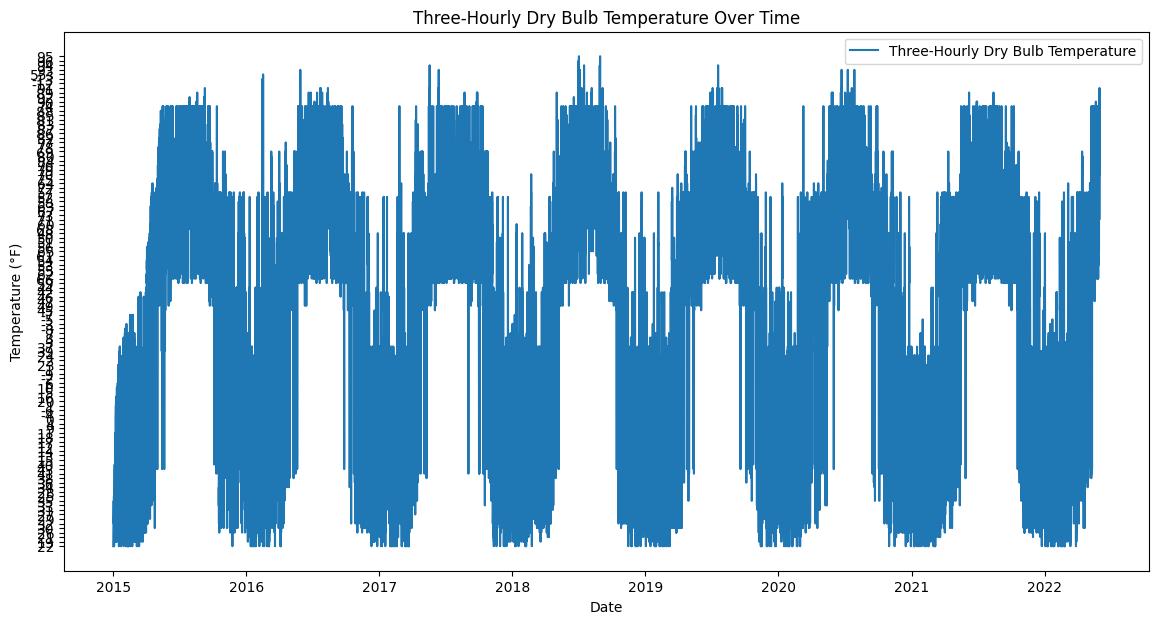

In [ ]:
# Three-Hourly Data: Summary Statistics
print("Three-Hourly Data Summary Statistics:")
print(three_hourly_df.describe())

# Plot Three-Hourly Temperature Trends
plt.figure(figsize=(14,7))
plt.plot(three_hourly_df['DATE'], three_hourly_df['HourlyDryBulbTemperature'], label='Three-Hourly Dry Bulb Temperature')
plt.title('Three-Hourly Dry Bulb Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()



Hourly Data Summary Statistics:
            STATION                           DATE        SOURCE  \
count  6.472900e+04                          64729  64729.000000   
mean   7.251801e+10  2018-09-16 02:04:34.334841856      6.994207   
min    7.251801e+10            2015-01-01 00:51:00      6.000000   
25%    7.251801e+10            2016-11-07 02:51:00      7.000000   
50%    7.251801e+10            2018-09-15 14:51:00      7.000000   
75%    7.251801e+10            2020-07-25 06:51:00      7.000000   
max    7.251801e+10            2022-05-31 23:51:00      7.000000   
std    0.000000e+00                            NaN      0.075894   

       BackupElevation  BackupLatitude  BackupLongitude  \
count          64729.0    64729.000000     64729.000000   
mean             260.0       42.689775       -73.828303   
min              260.0       42.681200       -73.831090   
25%              260.0       42.691800       -73.831090   
50%              260.0       42.691800       -73.831090   
7

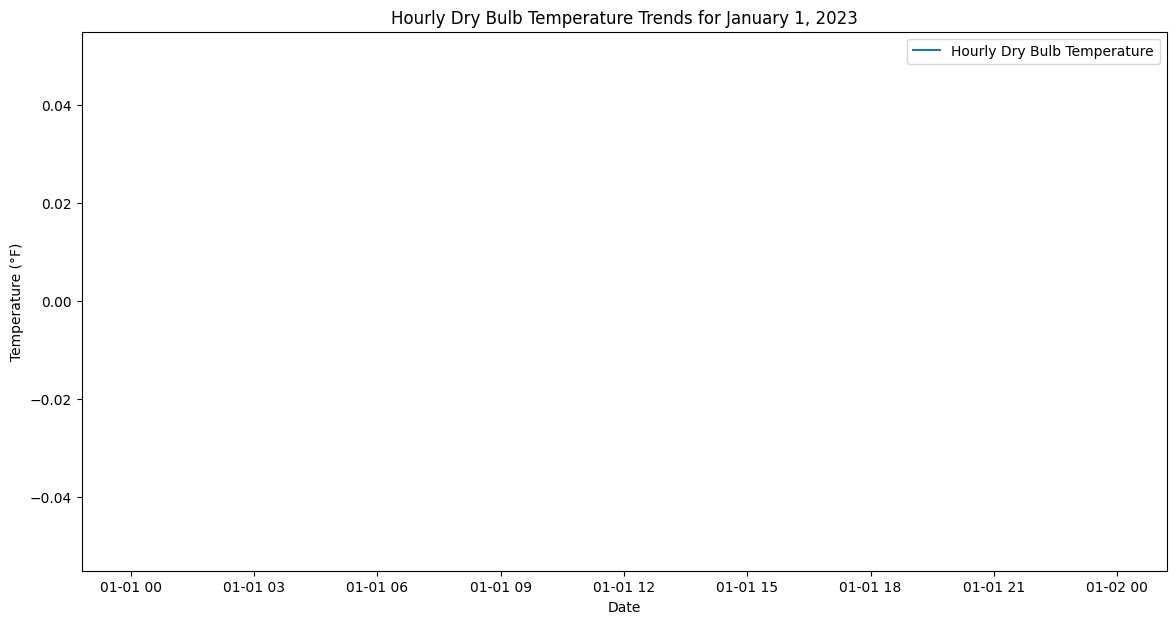

In [ ]:
# Hourly Data: Summary Statistics
print("Hourly Data Summary Statistics:")
print(hourly_df.describe())

# Choose a specific date for filtering
specific_date = pd.to_datetime('2023-01-01')

# Filter data for the specific date
specific_day = hourly_df[hourly_df['DATE'].dt.date == specific_date.date()]

# Display the filtered data to ensure it's correct
print(specific_day)

# Plot hourly temperature trends for the specific date
plt.figure(figsize=(14,7))
plt.plot(specific_day['DATE'], specific_day['HourlyDryBulbTemperature'], label='Hourly Dry Bulb Temperature')
plt.title('Hourly Dry Bulb Temperature Trends for January 1, 2023')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()




Date Range in Hourly Data:
2015-01-01 00:51:00
2022-05-31 23:51:00
Unique Dates in Hourly Data:
[datetime.date(2015, 1, 1) datetime.date(2015, 1, 2)
 datetime.date(2015, 1, 3) ... datetime.date(2022, 5, 29)
 datetime.date(2022, 5, 30) datetime.date(2022, 5, 31)]
        STATION                DATE REPORT_TYPE  SOURCE BackupElements  \
0   72518014735 2015-01-01 00:51:00       FM-15       7         PRECIP   
1   72518014735 2015-01-01 01:51:00       FM-15       7         PRECIP   
2   72518014735 2015-01-01 02:51:00       FM-15       7         PRECIP   
3   72518014735 2015-01-01 03:51:00       FM-15       7         PRECIP   
4   72518014735 2015-01-01 04:51:00       FM-15       7         PRECIP   
5   72518014735 2015-01-01 05:51:00       FM-15       7         PRECIP   
6   72518014735 2015-01-01 06:51:00       FM-15       7         PRECIP   
7   72518014735 2015-01-01 07:51:00       FM-15       7         PRECIP   
8   72518014735 2015-01-01 08:51:00       FM-15       7         PRECIP 

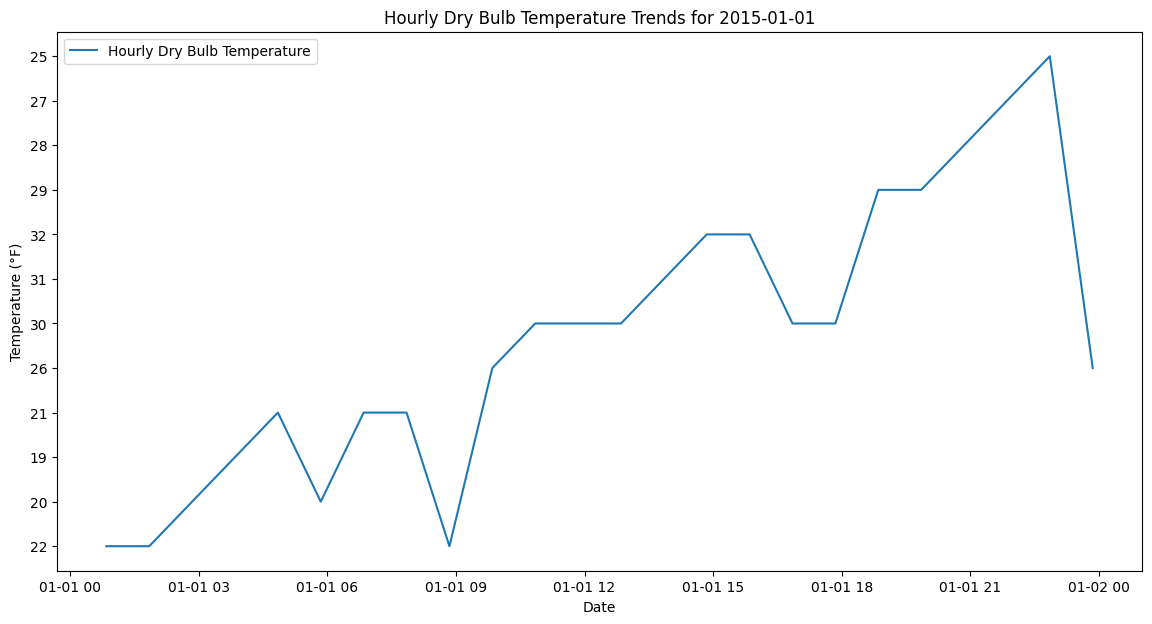

In [ ]:
# Check the range of dates in the dataset
print("Date Range in Hourly Data:")
print(hourly_df['DATE'].min())
print(hourly_df['DATE'].max())

# Display unique dates in the dataset
print("Unique Dates in Hourly Data:")
print(hourly_df['DATE'].dt.date.unique())

# Choose an existing date from the unique dates
existing_date = hourly_df['DATE'].dt.date.unique()[0]  # Select the first available date
specific_day = hourly_df[hourly_df['DATE'].dt.date == existing_date]

# Display the filtered data to ensure it's correct
print(specific_day)

# Plot hourly temperature trends for the existing date
plt.figure(figsize=(14,7))
plt.plot(specific_day['DATE'], specific_day['HourlyDryBulbTemperature'], label='Hourly Dry Bulb Temperature')
plt.title(f'Hourly Dry Bulb Temperature Trends for {existing_date}')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

# Load datasets
daily_df = pd.read_csv('/content/daily_data.csv')
monthly_df = pd.read_csv('/content/monthly_data.csv')
three_hourly_df = pd.read_csv('/content/three_hour_data.csv.zip')

with zipfile.ZipFile('/content/hourly_data.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')
hourly_df = pd.read_csv('/content/hourly_data.csv')

# Convert date columns to datetime format
daily_df['DATE'] = pd.to_datetime(daily_df['DATE'], errors='coerce')
monthly_df['DATE'] = pd.to_datetime(monthly_df['DATE'], errors='coerce')
three_hourly_df['DATE'] = pd.to_datetime(three_hourly_df['DATE'], errors='coerce')
hourly_df['DATE'] = pd.to_datetime(hourly_df['DATE'], errors='coerce')



<ipython-input-3-8d2123a39d72>:14: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  hourly_df = pd.read_csv('/content/hourly_data.csv')


Daily Data Summary Statistics:
            STATION                           DATE  SOURCE  BackupElevation  \
count  2.668000e+03                           2668  2668.0           2668.0   
mean   7.251801e+10  2018-10-01 14:07:27.346326784     6.0            260.0   
min    7.251801e+10            2015-01-01 23:59:00     6.0            260.0   
25%    7.251801e+10            2016-11-29 17:59:00     6.0            260.0   
50%    7.251801e+10            2018-10-02 11:59:00     6.0            260.0   
75%    7.251801e+10            2020-08-03 05:59:00     6.0            260.0   
max    7.251801e+10            2022-05-31 23:59:00     6.0            260.0   
std    0.000000e+00                            NaN     0.0              0.0   

       BackupLatitude  BackupLongitude  DailyAverageDewPointTemperature  \
count     2668.000000      2668.000000                      2668.000000   
mean        42.689750       -73.828268                        38.217766   
min         42.681200       -73.

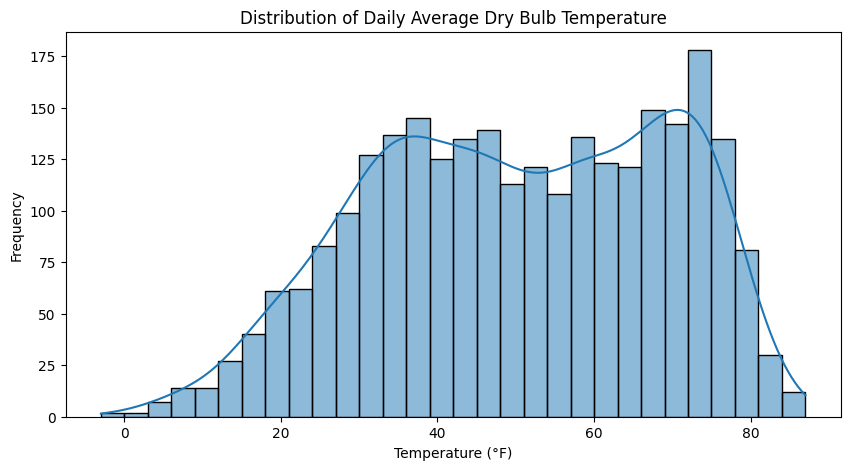

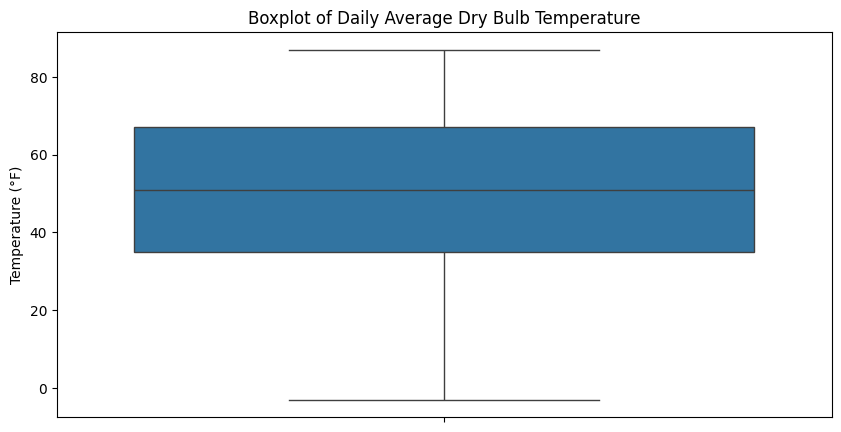

In [ ]:
# Daily Data: Summary Statistics
print("Daily Data Summary Statistics:")
print(daily_df.describe())

# Histogram of Daily Average Dry Bulb Temperature
plt.figure(figsize=(10,5))
sns.histplot(daily_df['DailyAverageDryBulbTemperature'].dropna(), bins=30, kde=True)
plt.title('Distribution of Daily Average Dry Bulb Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Daily Average Dry Bulb Temperature
plt.figure(figsize=(10,5))
sns.boxplot(y=daily_df['DailyAverageDryBulbTemperature'].dropna())
plt.title('Boxplot of Daily Average Dry Bulb Temperature')
plt.ylabel('Temperature (°F)')
plt.show()


Monthly Data Summary Statistics:
            STATION                           DATE  SOURCE       AWND  \
count  8.700000e+01                             87    87.0  87.000000   
mean   7.251801e+10  2018-09-25 12:40:22.758621184     6.0   7.596552   
min    7.251801e+10            2015-01-31 23:59:00     6.0   4.700000   
25%    7.251801e+10            2016-11-15 23:59:00     6.0   6.500000   
50%    7.251801e+10            2018-08-31 23:59:00     6.0   7.400000   
75%    7.251801e+10            2020-08-16 11:59:00     6.0   8.700000   
max    7.251801e+10            2022-05-31 23:59:00     6.0  10.700000   
std    0.000000e+00                            NaN     0.0   1.458930   

       BackupElevation  BackupLatitude  BackupLongitude         CDSD  \
count             87.0       87.000000        87.000000    87.000000   
mean             260.0       42.689729       -73.828239   362.954023   
min              260.0       42.681200       -73.831090     0.000000   
25%              260.

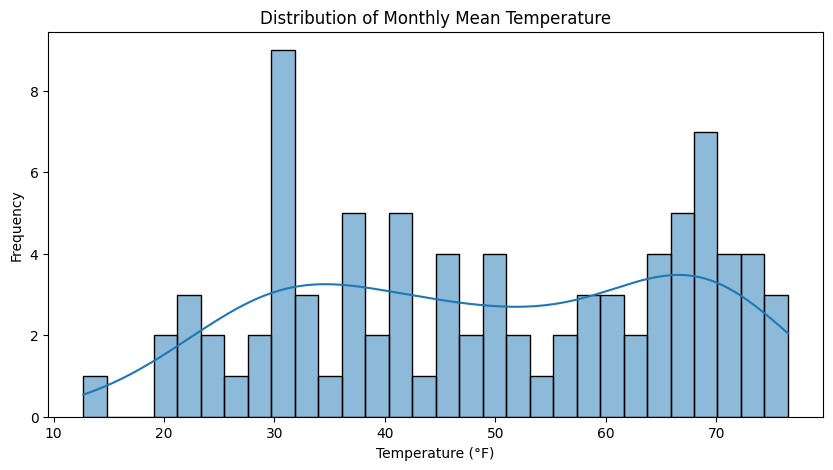

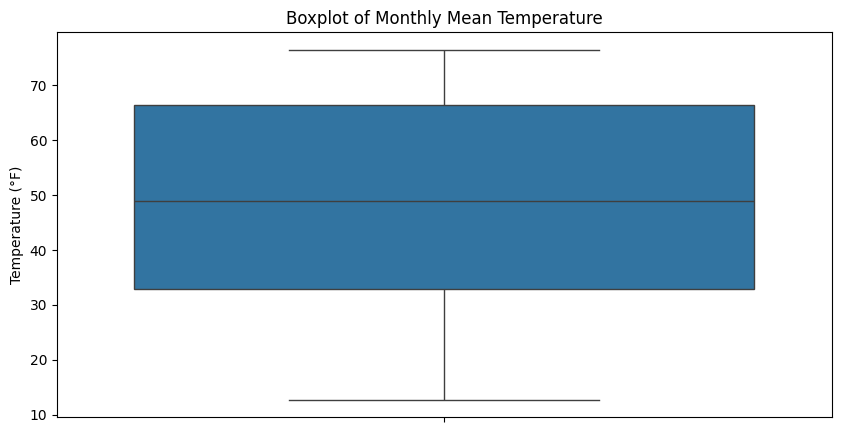

In [ ]:
# Monthly Data: Summary Statistics
print("Monthly Data Summary Statistics:")
print(monthly_df.describe())

# Histogram of Monthly Mean Temperature
plt.figure(figsize=(10,5))
sns.histplot(monthly_df['MonthlyMeanTemperature'].dropna(), bins=30, kde=True)
plt.title('Distribution of Monthly Mean Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Monthly Mean Temperature
plt.figure(figsize=(10,5))
sns.boxplot(y=monthly_df['MonthlyMeanTemperature'].dropna())
plt.title('Boxplot of Monthly Mean Temperature')
plt.ylabel('Temperature (°F)')
plt.show()


Three-Hourly Data Summary Statistics:
            STATION                           DATE   SOURCE  BackupElevation  \
count  2.084300e+04                          20843  20843.0          20843.0   
mean   7.251801e+10  2018-09-15 11:37:46.084537088      4.0            260.0   
min    7.251801e+10            2015-01-01 01:00:00      4.0            260.0   
25%    7.251801e+10            2016-11-08 14:30:00      4.0            260.0   
50%    7.251801e+10            2018-09-14 07:00:00      4.0            260.0   
75%    7.251801e+10            2020-07-23 11:30:00      4.0            260.0   
max    7.251801e+10            2022-05-31 22:00:00      4.0            260.0   
std    0.000000e+00                            NaN      0.0              0.0   

       BackupLatitude  BackupLongitude  HourlyPressureChange  \
count    20843.000000     20843.000000          20843.000000   
mean        42.689777       -73.828305              0.001490   
min         42.681200       -73.831090           

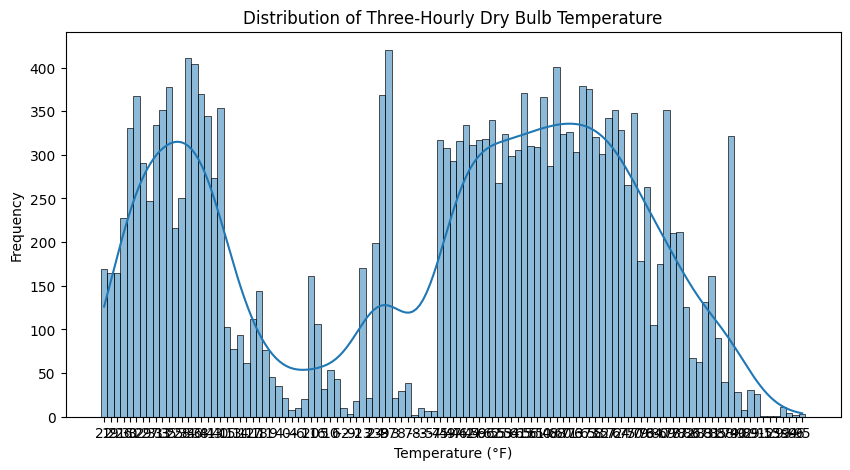

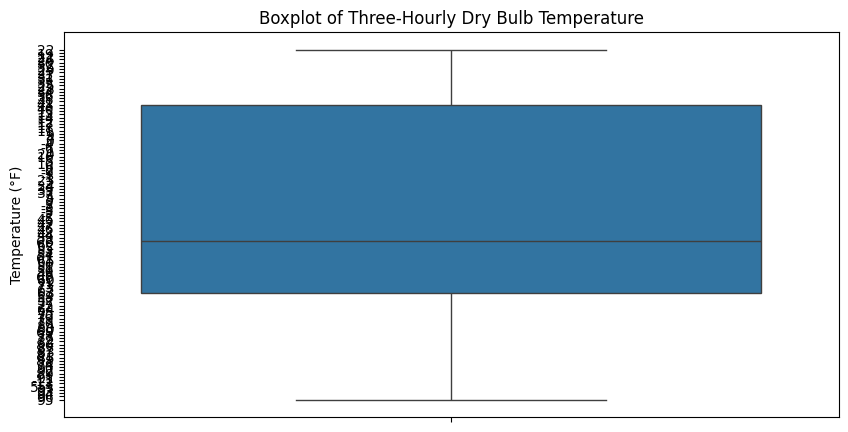

In [ ]:
# Three-Hourly Data: Summary Statistics
print("Three-Hourly Data Summary Statistics:")
print(three_hourly_df.describe())

# Histogram of Three-Hourly Dry Bulb Temperature
plt.figure(figsize=(10,5))
sns.histplot(three_hourly_df['HourlyDryBulbTemperature'].dropna(), bins=30, kde=True)
plt.title('Distribution of Three-Hourly Dry Bulb Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Three-Hourly Dry Bulb Temperature
plt.figure(figsize=(10,5))
sns.boxplot(y=three_hourly_df['HourlyDryBulbTemperature'].dropna())
plt.title('Boxplot of Three-Hourly Dry Bulb Temperature')
plt.ylabel('Temperature (°F)')
plt.show()


In [ ]:
# Convert 'HourlyDryBulbTemperature' to numeric, coercing errors
hourly_df['HourlyDryBulbTemperature'] = pd.to_numeric(hourly_df['HourlyDryBulbTemperature'], errors='coerce')

# Drop rows with NaN values in 'HourlyDryBulbTemperature'
hourly_df = hourly_df.dropna(subset=['HourlyDryBulbTemperature'])

# Display summary statistics after cleaning
print("Hourly Data Summary Statistics (after cleaning):")
print(hourly_df.describe())



Hourly Data Summary Statistics (after cleaning):
            STATION                           DATE        SOURCE  \
count  6.472800e+04                          64728  64728.000000   
mean   7.251801e+10  2018-09-16 02:25:32.467556352      6.994207   
min    7.251801e+10            2015-01-01 00:51:00      6.000000   
25%    7.251801e+10            2016-11-07 03:36:00      7.000000   
50%    7.251801e+10            2018-09-15 15:51:00      7.000000   
75%    7.251801e+10            2020-07-25 07:06:00      7.000000   
max    7.251801e+10            2022-05-31 23:51:00      7.000000   
std    0.000000e+00                            NaN      0.075895   

       BackupElevation  BackupLatitude  BackupLongitude  \
count          64728.0    64728.000000     64728.000000   
mean             260.0       42.689775       -73.828303   
min              260.0       42.681200       -73.831090   
25%              260.0       42.691800       -73.831090   
50%              260.0       42.691800     

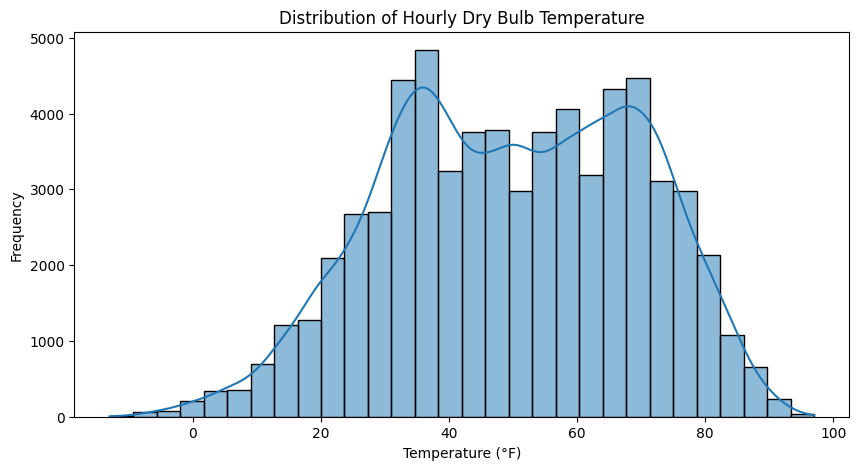

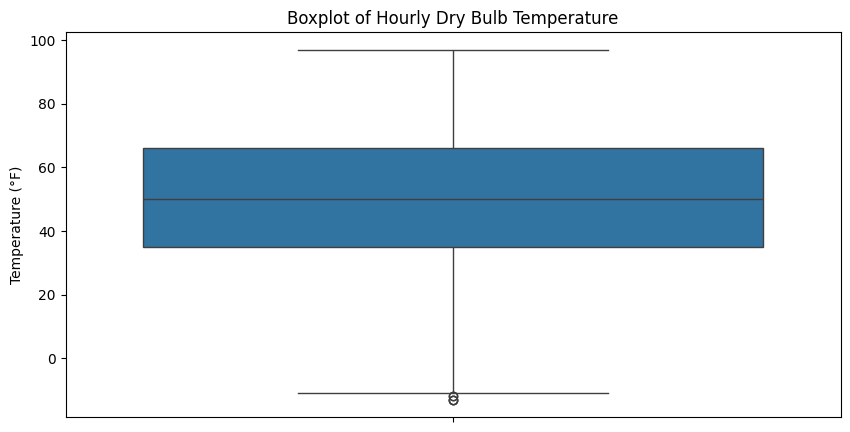

In [ ]:
# Histogram of Hourly Dry Bulb Temperature
plt.figure(figsize=(10,5))
sns.histplot(hourly_df['HourlyDryBulbTemperature'], bins=30, kde=True)
plt.title('Distribution of Hourly Dry Bulb Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of Hourly Dry Bulb Temperature
plt.figure(figsize=(10,5))
sns.boxplot(y=hourly_df['HourlyDryBulbTemperature'])
plt.title('Boxplot of Hourly Dry Bulb Temperature')
plt.ylabel('Temperature (°F)')
plt.show()


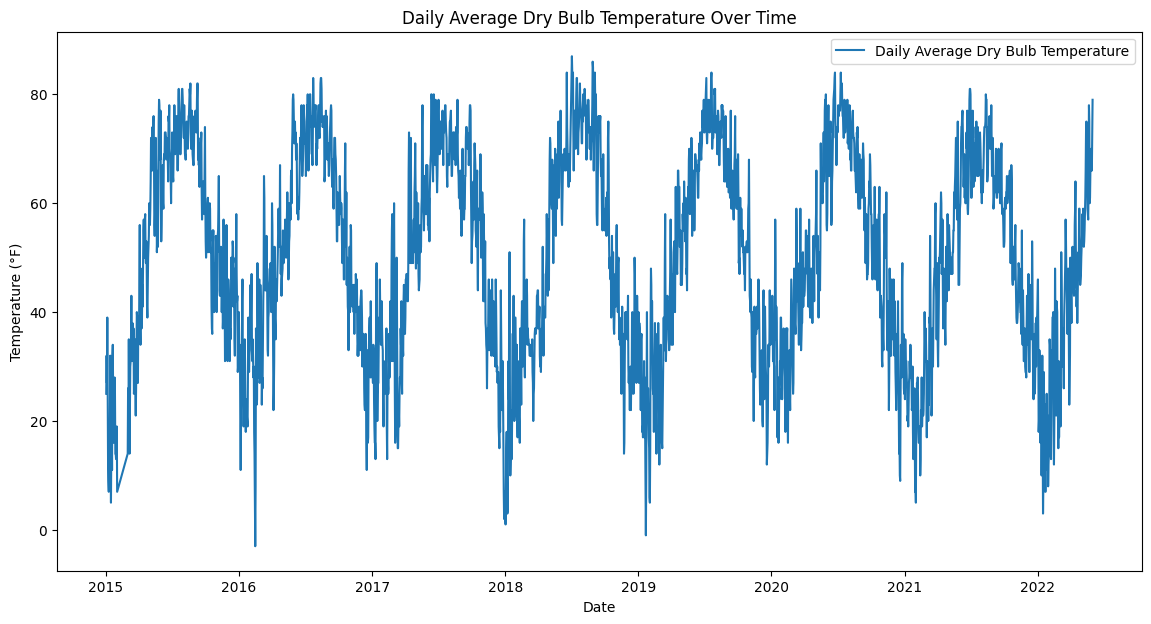

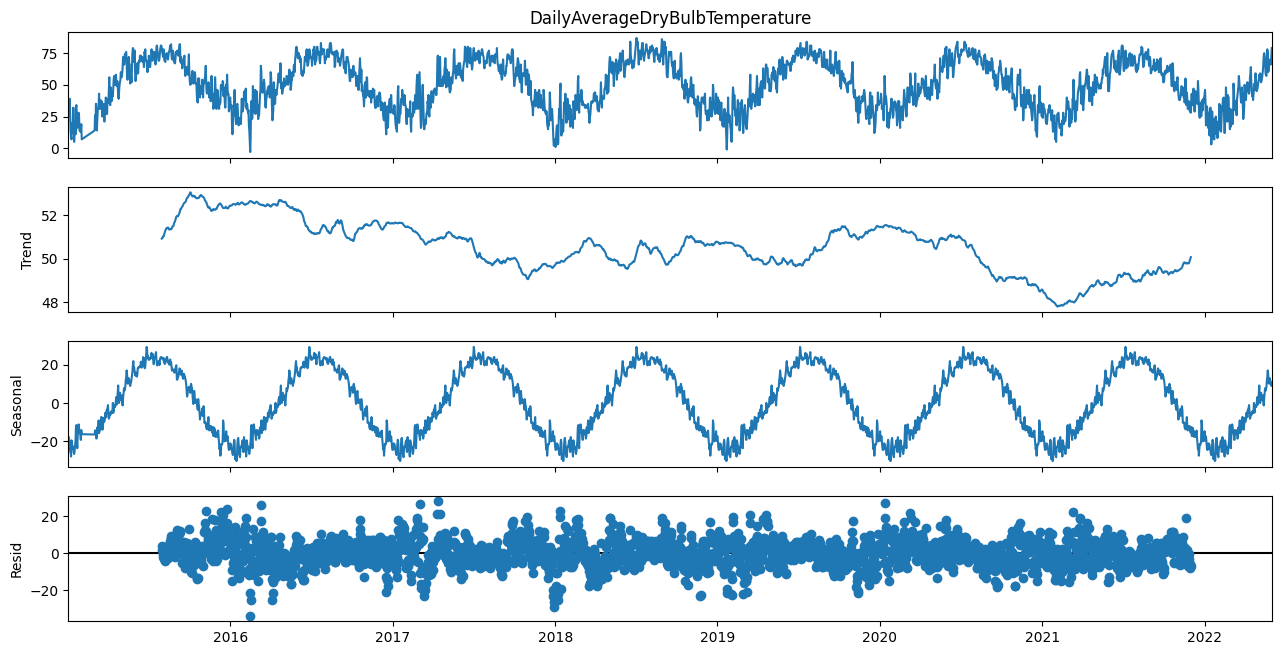

In [ ]:
# Plot Daily Average Temperature
plt.figure(figsize=(14,7))
plt.plot(daily_df['DATE'], daily_df['DailyAverageDryBulbTemperature'], label='Daily Average Dry Bulb Temperature')
plt.title('Daily Average Dry Bulb Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Decompose the time series to identify trends and seasonality
from statsmodels.tsa.seasonal import seasonal_decompose

daily_temp = daily_df.set_index('DATE')['DailyAverageDryBulbTemperature'].dropna()
decomposition = seasonal_decompose(daily_temp, model='additive', period=365)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()


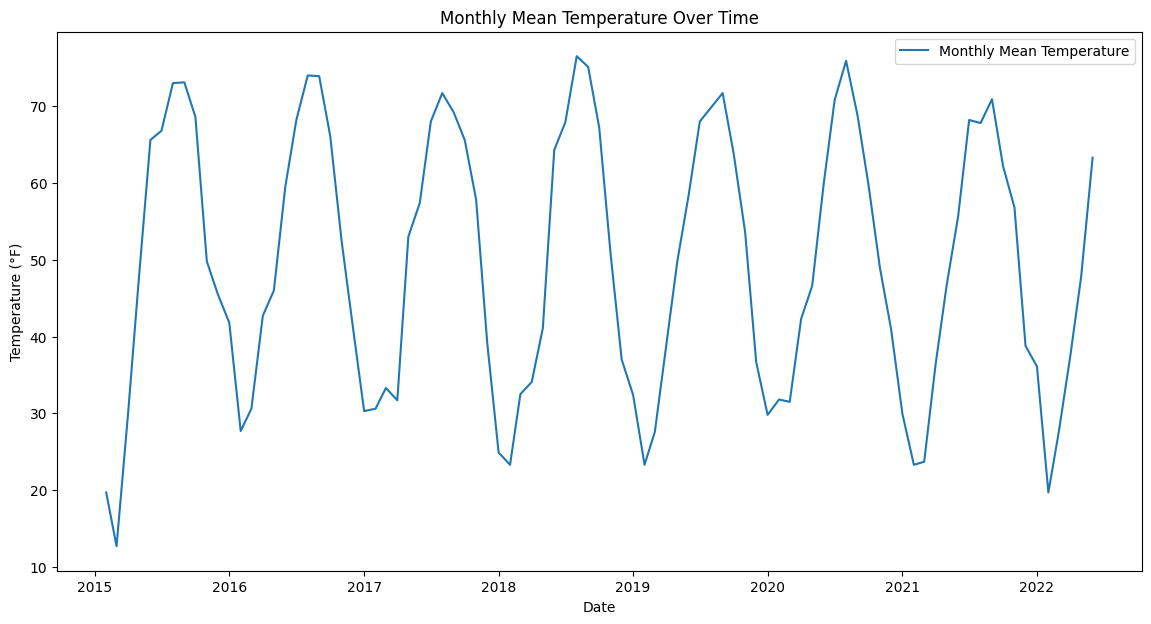

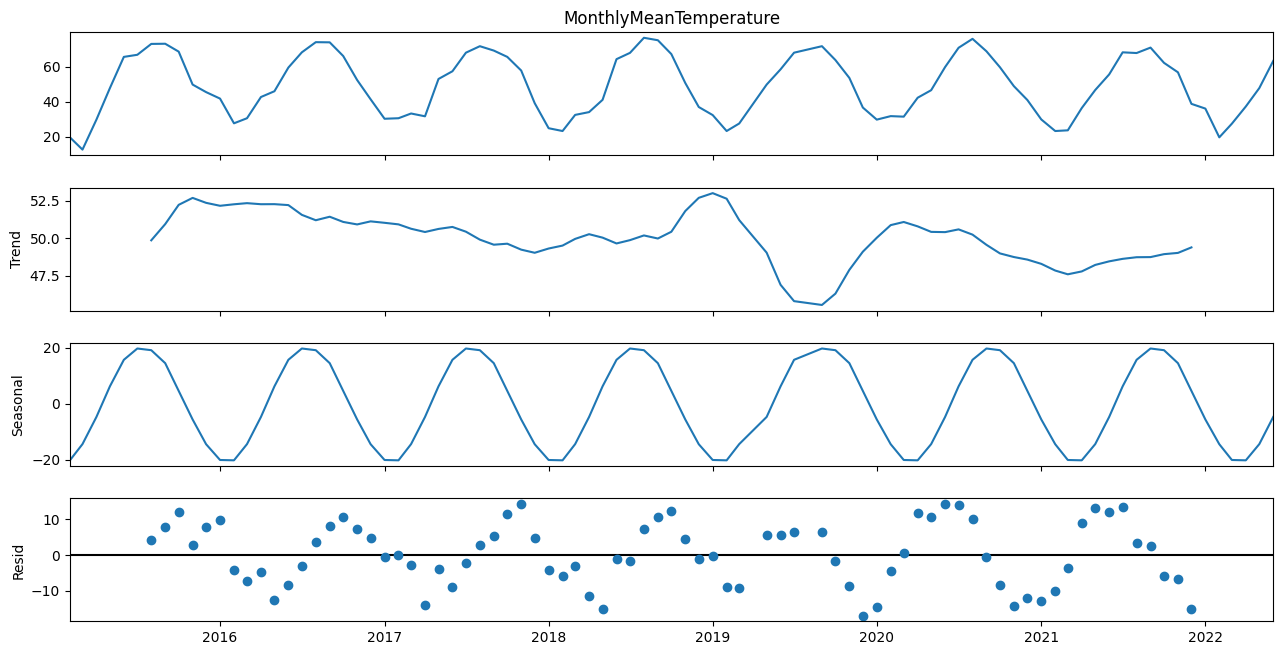

In [ ]:
# Plot Monthly Mean Temperature
plt.figure(figsize=(14,7))
plt.plot(monthly_df['DATE'], monthly_df['MonthlyMeanTemperature'], label='Monthly Mean Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.legend()
plt.show()

# Decompose the time series to identify trends and seasonality
monthly_temp = monthly_df.set_index('DATE')['MonthlyMeanTemperature'].dropna()
decomposition = seasonal_decompose(monthly_temp, model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()
